<a href="https://colab.research.google.com/github/C01day/Colab/blob/main/Shapelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyts

In [ ]:
from pyts.classification import LearningShapelets
from pyts.datasets import load_gunpoint
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
import numpy as np
# (50,150) (50,1)
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

X_train.shape

(50, 150)

In [ ]:
clf = LearningShapelets(random_state=42, tol=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.predict(X_test))

0.7666666666666667
[1 2 2 1 2 2 1 2 1 2 2 1 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 1 1 1 2 2 2 2 2 1 1
 1 1 1 2 2 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 2 1 1 1 1 1 2 2 2 2 2 1 2
 2 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 2 2 2
 2 1 2 1 1 2 1 2 2 1 2 2 2 1 2 1 1 2 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 1 1
 2 1]


In [ ]:
shapelets = np.asarray([clf.shapelets_[0, -9], clf.shapelets_[0, -12]])

# shapelets有很多种，(15,1),(30,1)...
print(clf.shapelets_[0][0].shape)

(15,)


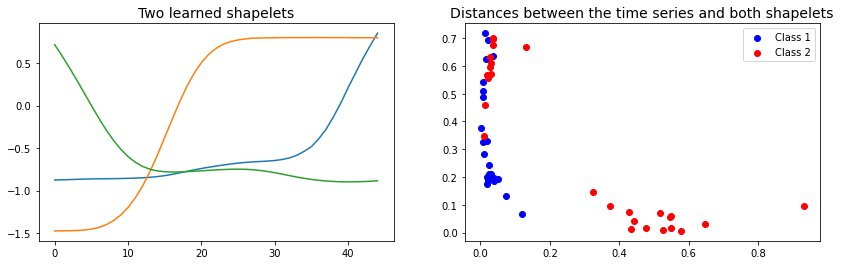

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyts.classification import LearningShapelets
from pyts.datasets import load_gunpoint
from pyts.utils import windowed_view

# Load the data set and fit the classifier
X, _, y, _ = load_gunpoint(return_X_y=True)
clf = LearningShapelets(random_state=42, tol=0.01)
clf.fit(X, y)

# Select two shapelets
shapelets = np.asarray([clf.shapelets_[0, -9], clf.shapelets_[0, -12], clf.shapelets_[0, -15]])

# Derive the distances between the time series and the shapelets
shapelet_size = shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean(
    (X_window[:, :, None] - shapelets[None, :]) ** 2, axis=3).min(axis=1)


plt.figure(figsize=(14, 4))

# Plot the two shapelets
plt.subplot(1, 2, 1)
plt.plot(shapelets[0])
plt.plot(shapelets[1])
plt.plot(shapelets[2])
plt.title('Two learned shapelets', fontsize=14)

# Plot the distances
plt.subplot(1, 2, 2)
for color, label in zip('br', (1, 2)):
    plt.scatter(X_dist[y == label, 0], X_dist[y == label, 1],
                c=color, label='Class {}'.format(label))
plt.title('Distances between the time series and both shapelets',
          fontsize=14)
plt.legend()
plt.show()